Some sources

https://github.com/librosa/librosa

https://magenta.tensorflow.org/onsets-frames

http://pythonforengineers.com/audio-and-digital-signal-processingdsp-in-python/

First generate a sin wave and save it as wav file http://pythonforengineers.com/audio-and-digital-signal-processingdsp-in-python/

In [ ]:
import numpy as np
 
import wave
 
import struct
 
import matplotlib.pyplot as plt
 
# frequency is the number of times a wave repeats a second
 
frequency = 1000
 
num_samples = 48000
 
# The sampling rate of the analog to digital convert
 
sampling_rate = 48000.0
 
amplitude = 16000
 
file = "test.wav"

sine_wave_part = [np.sin(2 * np.pi * frequency * x/sampling_rate) for x in range(num_samples)] + [0] * num_samples + [np.sin(2 * np.pi * frequency*2 * x/sampling_rate) for x in range(num_samples)] + [0] * num_samples

for i in range(10):
    sine_wave += sine_wave_part

print(sine_wave[:10])
print(len(sine_wave))



In [ ]:
nframes=num_samples
 
comptype="NONE"
 
compname="not compressed"
 
nchannels=1
 
sampwidth=2


wav_file=wave.open(file, 'w')
 
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))

for s in sine_wave:
   wav_file.writeframes(struct.pack('h', int(s*amplitude)))

print("ready!!!")

Load wav and paint the spectrogram

In [ ]:
from __future__ import print_function
# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

audio_path = 'test.wav'

y, sr = librosa.load(audio_path)

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

plt.savefig("testSpectrogram.png")

only image

In [ ]:
from __future__ import print_function
# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

audio_path = 'test.wav'

y, sr = librosa.load(audio_path)

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))


# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr)

Only one second

In [ ]:
from __future__ import print_function
# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

audio_path = 'test.wav'

y, sr = librosa.load(audio_path)

#use sr (sampling rate) to split data in seconds
import os 
if not os.path.exists("dataset"):
    os.makedirs("dataset")
    
initial = 0
final = sr
for i in range(len(y)/sr):
    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S = librosa.feature.melspectrogram(y[initial:final], sr=sr, n_mels=128)

    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.power_to_db(S, ref=np.max)

    # Make a new figure
    plt.figure(figsize=(12,4))


    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    librosa.display.specshow(log_S, sr=sr)    
    
    #create dataset with 0 for silence and 1 for sound
    if i % 2 == 0:
        plt.savefig("dataset/second_"+str(i)+"_label_1.png")
    else:
        plt.savefig("dataset/second_"+str(i)+"_label_0.png")
    initial += sr
    final += sr
    



In [ ]:
print(len(y))
print(sr)
len(y)/sr

# Load data

In [106]:
import os
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

images = []
labels = []

folder = "dataset"
for image in os.listdir(folder):
    print(image)
    images.append(plt.imread(folder + "/" + image))
    labels.append(int(image.split("_")[3].split(".")[0]))
    
images = np.array(images)
labels = np.array(labels)
print(labels)
images.shape

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(images)
data = images.reshape((n_samples, -1))


second_18_label_1.png
second_16_label_1.png
second_4_label_1.png
second_5_label_0.png
second_19_label_0.png
second_8_label_1.png
second_11_label_0.png
second_6_label_1.png
second_13_label_0.png
second_21_label_0.png
second_3_label_0.png
second_2_label_1.png
second_0_label_1.png
second_17_label_0.png
second_14_label_1.png
second_9_label_0.png
second_15_label_0.png
second_12_label_1.png
second_1_label_0.png
second_20_label_1.png
second_10_label_1.png
second_7_label_0.png
[1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0]


In [ ]:
images[0].shape

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         5
          1       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        11


Confusion matrix:
[[5 0]
 [0 6]]


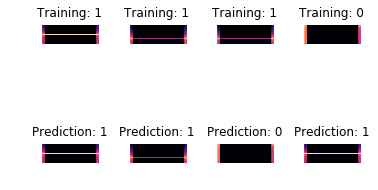

In [107]:

images_and_labels = list(zip(images, labels))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], labels[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = labels[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

Predictions for test:
[1 0 1 0 1 0]
score:
1.0


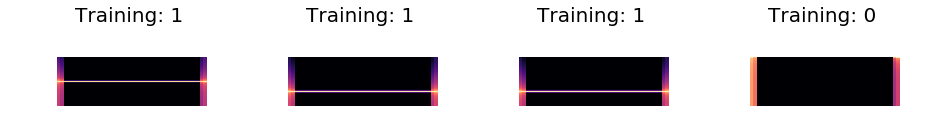

In [123]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))

images_and_labels = list(zip(images, labels))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(1, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i\n' % label, fontsize = 20)
    
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)

predictions = logisticRegr.predict(x_test)
print("Predictions for test:")
print(predictions)

# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print("score:")
print(score)


# Logistic Regression https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

Image Data Shape (1797, 64)
Label Data Shape (1797,)


ValueError: Found array with dim 3. Estimator expected <= 2.

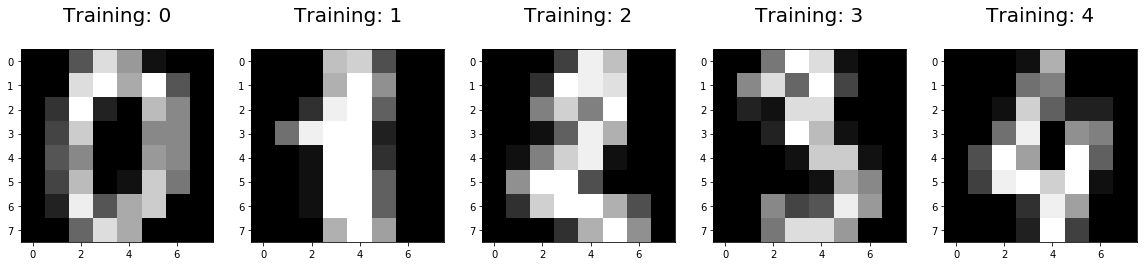

In [100]:
from sklearn.datasets import load_digits
digits = load_digits()

# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)

In [111]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([1])

In [112]:
logisticRegr.predict(x_test[0:10])


array([1, 0, 1, 0, 1, 0])

In [113]:
predictions = logisticRegr.predict(x_test)
print(predictions)

[1 0 1 0 1 0]


In [114]:


# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

1.0


# SVM http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

In [ ]:


# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [ ]:
import pickle

In [ ]:
print("hello")
a = [1,2,3,4,5]

In [ ]:
pickle.dump(a, open('test.p','wb'))

In [ ]:
print("load pickle")

In [ ]:
loaded = pickle.load(file('test.p'))

In [ ]:
print a